In [1]:
# Importation des librairies 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "iframe_connected"
import plotly.express as px

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, roc_curve
from sklearn.metrics import classification_report


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
# Jimporte mon dataset
dataset = pd.read_csv('sample_dataset.csv', sep=';', engine='python')

In [3]:
dataset.head()

,id_firm,activity_index,bonus_a,bonus_c,origin,monoact_code,naf_code,legal_code,age_months,zipcode,nb_employees,paydex,nb_sites,ind_privilege,mmd020101,mmd0303,mmd0402,mmd0501,bad,bad_type
1,33344,3.0,NaN,C11,NaN,1.0,5510Z,NaN,796.0,13.0,NN,NaN,1,0,NaN,NaN,NaN,NaN,1,LJ
2,37780,2.0,NaN,C11,1,1.0,0000Z,NaN,217.0,13.0,00,NaN,1,0,NaN,NaN,NaN,NaN,1,LJ
3,45262,9.0,NaN,C5,1,1.0,6820A,NaN,749.0,89.0,NN,NaN,1,0,NaN,NaN,NaN,NaN,1,LJ
4,48596,18.0,NaN,C6,3,1.0,9602A,NaN,569.0,67.0,02,NaN,1,0,NaN,NaN,NaN,NaN,1,LJ
5,49911,30.0,NaN,C6,1,1.0,4662Z,NaN,565.0,82.0,03,54.0,1,0,NaN,NaN,NaN,MMD0501_0_11,1,LJ


In [4]:
dataset.shape

(100000, 20)

In [5]:
dataset.columns

Index(['id_firm', 'activity_index', 'bonus_a', 'bonus_c', 'origin',
       'monoact_code', 'naf_code', 'legal_code', 'age_months', 'zipcode',
       'nb_employees', 'paydex', 'nb_sites', 'ind_privilege', 'mmd020101',
       'mmd0303', 'mmd0402', 'mmd0501', 'bad', 'bad_type'],
      dtype='object')

In [6]:
dataset.describe(include='all')
# Analyser les stats pr préparer mes préprocessing 

,id_firm,activity_index,bonus_a,bonus_c,origin,monoact_code,naf_code,legal_code,age_months,zipcode,nb_employees,paydex,nb_sites,ind_privilege,mmd020101,mmd0303,mmd0402,mmd0501,bad,bad_type
count,1.000000e+05,99535.000000,2776,100000,99228,95032.000000,99971,0.0,99954.000000,99905.000000,99959,9841.000000,100000.000000,100000.000000,9068,1257,2154,8744,100000.00000,1363
unique,NaN,NaN,5,13,12,NaN,653,NaN,NaN,NaN,15,NaN,NaN,NaN,3,3,3,3,NaN,3
top,NaN,NaN,A4,C11,1,NaN,7022Z,NaN,NaN,NaN,NN,NaN,NaN,NaN,MMD020101_24_60,MMD0303_24_60,MMD0402_24_60,MMD0501_12_35,NaN,LJ
freq,NaN,NaN,2338,35921,89724,NaN,5593,NaN,NaN,NaN,32794,NaN,NaN,NaN,5497,961,1223,4428,NaN,1207
mean,1.686231e+07,7.542744,NaN,NaN,NaN,1.007429,NaN,NaN,94.922034,137.800260,NaN,68.083020,1.048410,0.001180,NaN,NaN,NaN,NaN,0.01363,NaN
std,8.055985e+06,8.108525,NaN,NaN,NaN,0.207629,NaN,NaN,119.197545,255.398305,NaN,18.335727,3.051708,0.040971,NaN,NaN,NaN,NaN,0.11595,NaN
min,1.173000e+04,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,-11.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.00000,NaN
25%,1.345830e+07,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,12.000000,35.000000,NaN,64.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,0.00000,NaN
50%,2.039545e+07,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,50.000000,75.000000,NaN,77.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,0.00000,NaN
75%,2.336135e+07,12.000000,NaN,NaN,NaN,1.000000,NaN,NaN,138.000000,88.000000,NaN,80.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,0.00000,NaN


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_firm         100000 non-null  int64  
 1   activity_index  99535 non-null   float64
 2   bonus_a         2776 non-null    object 
 3   bonus_c         100000 non-null  object 
 4   origin          99228 non-null   object 
 5   monoact_code    95032 non-null   float64
 6   naf_code        99971 non-null   object 
 7   legal_code      0 non-null       float64
 8   age_months      99954 non-null   float64
 9   zipcode         99905 non-null   float64
 10  nb_employees    99959 non-null   object 
 11  paydex          9841 non-null    float64
 12  nb_sites        100000 non-null  int64  
 13  ind_privilege   100000 non-null  int64  
 14  mmd020101       9068 non-null    object 
 15  mmd0303         1257 non-null    object 
 16  mmd0402         2154 non-null    object 
 17  mmd0501   

In [8]:
display(100*dataset.isnull().sum()/dataset.shape[0])
# isnull pour calculer le pourcentage des valeurs manquantes

id_firm             0.000
activity_index      0.465
bonus_a            97.224
bonus_c             0.000
origin              0.772
monoact_code        4.968
naf_code            0.029
legal_code        100.000
age_months          0.046
zipcode             0.095
nb_employees        0.041
paydex             90.159
nb_sites            0.000
ind_privilege       0.000
mmd020101          90.932
mmd0303            98.743
mmd0402            97.846
mmd0501            91.256
bad                 0.000
bad_type           98.637
dtype: float64

In [9]:
dataset['bad'].value_counts()
# On peut dire qu'il y a 1363 Sociétés qui sont en défaillance on va s'intéresser à ces entreprises 
# Notre dataset est déséquilibré

0    98637
1     1363
Name: bad, dtype: int64

In [10]:
# Recodage de l'indicateur de défaillance vers une chaine de caractère:
dataset['bad']= dataset.bad.apply(lambda x: "Non défaillance" if x == 0
                                     else "Défaillance" if x == 1
                                     else "No data")

In [11]:
dataset['bad'].value_counts()

Non défaillance    98637
Défaillance         1363
Name: bad, dtype: int64

Text(0.5, 1.0, 'Répartition des Entreprises en défaillance')

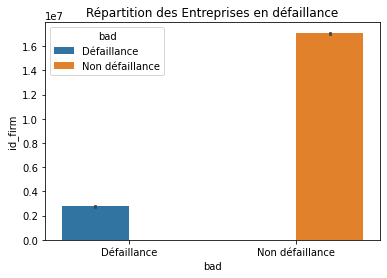

In [12]:
sns.barplot(data = dataset, x = 'bad',y='id_firm',hue='bad')
plt.title("Répartition des Entreprises en défaillance")

In [13]:
#Pour le features age_months on peut dire que selon le describe il y a des valeurs abérrantes min - 11 mois on peut
# faire un boxplot pour mieux le visualiser

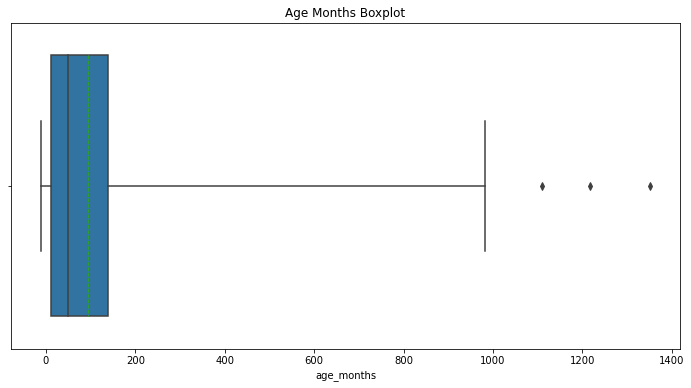

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x=dataset.age_months,whis=7,showmeans=True,
            meanline=True)
plt.title("Age Months Boxplot")
plt.show()
# Comme le montre le boxplot la valeur moyenne est au alentour de 95 mois soit 8 ans à peu près, la valeur max est 
# au alentour de 1351 mois soit 113 ans, on peut considérer les 3 derniers points comme des valeurs abérrantes puisque
# l'âge dépasse 99 ans qui est la limite fixée par le code de commerce et on considère aussi la valeur min -11 mois
# comme valeur abérrante
# Le trait noir c'est la médiane au alentour de 50 mois on a 50% de notre dataset qui ont un age entre 12 et 138 mois
# Les limites de la boite sont q1 et q3 qui représentent les quartiles 
# Les moustaches sont caclulés en fonction de la largeur de cette boite 
# Le whis nous permet de régler quel est l'outlier qui ne l'est pas 

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age_months', ylabel='Density'>

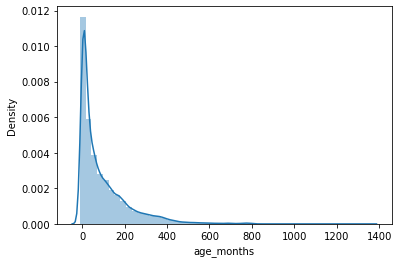

In [15]:
sns.distplot(dataset['age_months'],kde=True,bins=50)
# la courbe représente la densité de probabilité de ma vble age_months 

In [16]:
dataset['bad_type'].value_counts()
# Parmi c'est 1363 Entreprise qui sont en défaillance on 1207 qui sont en LJ .. 

LJ    1207
RJ     140
PS      16
Name: bad_type, dtype: int64

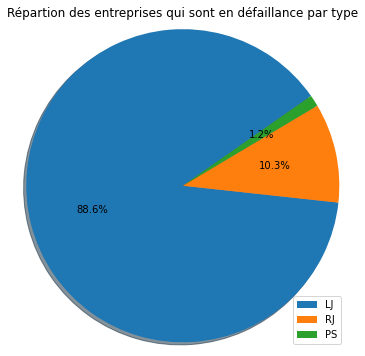

In [17]:
type_defaillance= dataset.bad_type.value_counts()
plt.figure(figsize = (8, 6))
plt.pie(type_defaillance, autopct='%1.1f%%', shadow=True, startangle=35, radius=1.2)
plt.legend(type_defaillance.index, loc='lower right')
plt.title("Répartion des entreprises qui sont en défaillance par type")
plt.show()

In [18]:
type_defaillance=dataset.groupby(['bad_type','bad'])

In [19]:
type_defaillance.get_group(('PS','Défaillance'))
# J'ai pu vérifier que les sociétés qui sont en défaillance sont les mm qui sont en RJ, LJ et PS

,id_firm,activity_index,bonus_a,bonus_c,origin,monoact_code,naf_code,legal_code,age_months,zipcode,nb_employees,paydex,nb_sites,ind_privilege,mmd020101,mmd0303,mmd0402,mmd0501,bad,bad_type
1348,502582,15.0,NaN,C5,1,1.0,5911A,NaN,461.0,75.0,03,NaN,1,0,NaN,MMD0303_24_60,NaN,NaN,Défaillance,PS
1349,654461,31.0,NaN,C1,9,1.0,4334Z,NaN,435.0,68.0,12,72.0,1,0,MMD020101_24_60,NaN,NaN,NaN,Défaillance,PS
1350,1070585,31.0,NaN,C2,1,1.0,8219Z,NaN,388.0,76.0,11,67.0,1,0,NaN,NaN,NaN,NaN,Défaillance,PS
1351,1304332,23.0,NaN,C2,1,1.0,4762Z,NaN,771.0,76.0,02,45.0,1,0,NaN,NaN,NaN,NaN,Défaillance,PS
1352,1344935,22.0,NaN,C5,9,1.0,5814Z,NaN,362.0,75.0,03,NaN,1,0,NaN,NaN,NaN,NaN,Défaillance,PS
1353,1439002,32.0,NaN,C6,1,1.0,1013A,NaN,365.0,47.0,11,60.0,1,0,MMD020101_24_60,NaN,NaN,NaN,Défaillance,PS
1354,1527611,34.0,A4,C5,9,1.0,5621Z,NaN,358.0,93.0,22,65.0,1,0,MMD020101_24_60,NaN,NaN,MMD0501_12_35,Défaillance,PS
1355,1674154,34.0,NaN,C1,9,1.0,4321A,NaN,687.0,5.0,21,80.0,1,0,NaN,NaN,NaN,NaN,Défaillance,PS
1356,1703708,34.0,NaN,C1,1,1.0,5510Z,NaN,349.0,75.0,32,21.0,22,0,MMD020101_24_60,MMD0303_12_23,NaN,NaN,Défaillance,PS
1357,1814686,28.0,NaN,C6,9,1.0,5811Z,NaN,336.0,45.0,11,80.0,1,0,NaN,NaN,NaN,NaN,Défaillance,PS


In [20]:
dataset['bonus_a'].value_counts()
#A1= 122 Actionnaire majoritaire en défaillance, A2 = 170 Actionnaire majoritaire avec grande solidité financière, 
#A3 = 120 Actionnaire majoritaire avec solidité financière,A3.5 = 26 Filiale en défaillance, 
#A4 = 2338 Présence d'un actionnaire majoritaire ni défaillant ni solide


A4      2338
A2       170
A1       122
A3       120
A3.5      26
Name: bonus_a, dtype: int64

In [21]:
# Recodage de bonus_a vers une chaine de caractère:
dataset['bonus_a']= dataset.bonus_a.apply(lambda x: "Actionnaire majoritaire en défaillance" if x == "A1"
                                     else "Actionnaire majoritaire avec grande solidité financière" if x == "A2"
                                     else "Actionnaire majoritaire avec solidité financière" if x == "A3"
                                     else "Filiale en défaillance" if x == "A3.5"
                                     else "Présence d'un actionnaire majoritaire ni défaillant ni solide" if x == "A4"
                                     else "unspecified")

In [22]:
dataset['bonus_a'].value_counts()

unspecified                                                      97224
Présence d'un actionnaire majoritaire ni défaillant ni solide     2338
Actionnaire majoritaire avec grande solidité financière            170
Actionnaire majoritaire en défaillance                             122
Actionnaire majoritaire avec solidité financière                   120
Filiale en défaillance                                              26
Name: bonus_a, dtype: int64

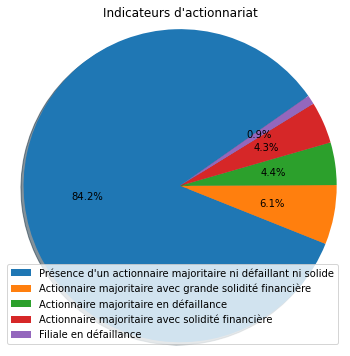

In [23]:
bonus_a= dataset.bonus_a.value_counts()[1:6]
plt.figure(figsize = (8,6))
plt.pie(bonus_a, autopct='%1.1f%%', shadow=True, startangle=35, radius=1.2)
plt.legend(bonus_a.index, loc='lower right')
plt.title("Indicateurs d'actionnariat")
plt.show()
# on doit se soucier des actionnaires majoritaires en défaillance et des filiales en défaillance car elles peuvent impacter leurs filiales

In [24]:
type_actionnariat=dataset.groupby(['bonus_a','bad'])

In [25]:
data=type_actionnariat.get_group(('Filiale en défaillance','Non défaillance'))
data.shape

(22, 20)

In [26]:
actionnaire_m_defaillant=dataset['bonus_a'].value_counts()[3]
n_defaillance=dataset["bad"].value_counts()[0]
defaillance=dataset["bad"].value_counts()[1]

In [27]:
filiale_defaillante=dataset['bonus_a'].value_counts()[5]


In [28]:
risque_inconuu = actionnaire_m_defaillant / n_defaillance
risque_connu =actionnaire_m_defaillant/ defaillance
data = [risque_inconuu, risque_connu]
print("Rapports\n {}".format(data))

Rapports
 [0.0012368583797155227, 0.08950843727072634]


In [29]:
data_actifs = np.array([1,1]) - data

In [30]:
legend = ["actionnaire_m_def/ n_defaillance", "actionnaire_m_def/defaillance"]

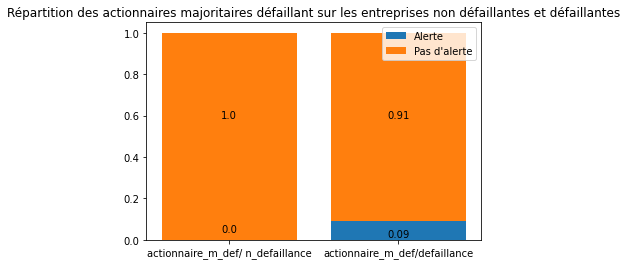

In [31]:
plt.figure()

plt.bar(legend, 
         data,
        label="Alerte")

plt.bar(legend,
        data_actifs, 
        bottom=data,
        label="Pas d'alerte")

plt.text(legend[0], 0.6, np.round(data_actifs[0],2), ha = "center", va = "center")
plt.text(legend[0], 0.05, np.round(data[0],2), ha = "center", va = "center")

plt.text(legend[1], 0.6, np.round(data_actifs[1],2), ha = "center", va = "center")
plt.text(legend[1], 0.025, np.round(data[1],2), ha = "center", va = "center")

plt.legend()
plt.title("Répartition des actionnaires majoritaires défaillant sur les entreprises non défaillantes et défaillantes")

plt.show()

In [32]:
dataset['bonus_c'].value_counts()

C11    35921
C12    34107
C6      8497
C5      6394
C1      6186
C2      2634
C7      2144
C3      1511
C4      1271
C8       815
C9       381
C13       80
C10       59
Name: bonus_c, dtype: int64

In [33]:
#dataset['activity_index'].value_counts()

In [34]:
dataset['origin'].value_counts()

1     89724
3      3974
9      2812
NR     1096
6      1013
4       416
C        99
8        73
D        11
F         5
5         4
7         1
Name: origin, dtype: int64

In [35]:
dataset.naf_code.value_counts()[:5]

7022Z    5593
6420Z    3468
5610A    3373
5610C    3274
6820B    2334
Name: naf_code, dtype: int64

In [36]:
# Recodage du code NAF vers une chaine de caractère:
dataset['naf_code']= dataset.naf_code.apply(lambda x: "Conseil pour les affaires et autres conseils de gestion" if x == "7022Z"
                                     else "Activités des sociétés holding" if x == "6420Z"
                                     else "Restauration traditionnelle" if x == "5610A"
                                     else "Restauration de type rapide" if x == "5610C"
                                     else "Location de terrains et d'autres biens immobiliers" if x == "6820B"
                                     else "the rest of data")

In [37]:
dataset['naf_code'].value_counts()

the rest of data                                           81958
Conseil pour les affaires et autres conseils de gestion     5593
Activités des sociétés holding                              3468
Restauration traditionnelle                                 3373
Restauration de type rapide                                 3274
Location de terrains et d'autres biens immobiliers          2334
Name: naf_code, dtype: int64

Text(0.5, 1.0, 'Les 5 secteurs les plus importants chez Alatres ')

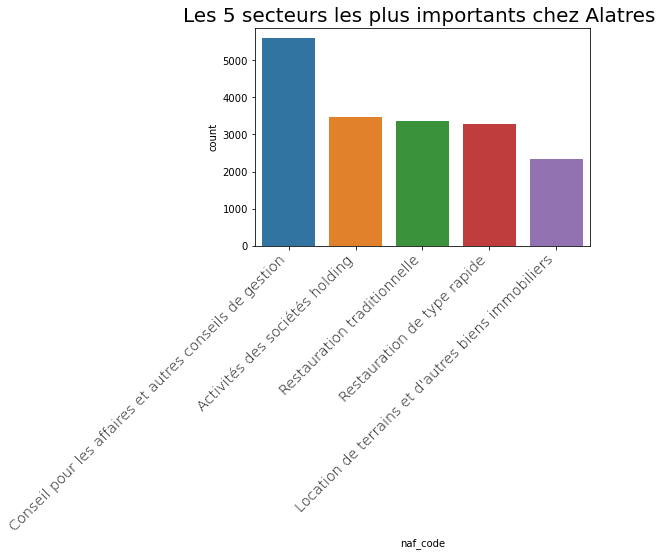

In [38]:
chart = sns.countplot(data= dataset, x='naf_code', order = dataset['naf_code'].value_counts()[1:6].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', 
                      fontweight='light', fontsize='x-large')
plt.title("Les 5 secteurs les plus importants chez Alatres ", fontsize=20)

In [39]:
dataset['ind_privilege'].value_counts()

0    99904
1       77
2       16
3        3
Name: ind_privilege, dtype: int64

Privilège : c’est l’Etat qui se met en  situation de privilège si l’entreprise dépose son bilan et donc être le premier à être payé sur
les actifs de cette entreprise, un privilège trésor public c’est qd il y a un litige entre l’Etat et l’entreprise ou privilège ursaf ou 
caisse complémentaire c’est un signal négatif puisque l’entreprise ne peut plus payer ses charges sociales ça montre que l’entreprise
va être bientôt en cessation de paiement donc la prédictivité du risque de défaillance est encore plus fort

In [40]:
dataset['ind_privilege']= dataset.ind_privilege.apply(lambda x: "Pas d'inscription privilège" if x == 0
                                     else "Privilèges TP" if x == 1
                                     else "Privilèges URSSAF" if x == 2
                                     else "Privilèges CC" if x == 3
                                     else "No data")

In [41]:
dataset['ind_privilege'].value_counts()

Pas d'inscription privilège    99904
Privilèges TP                     77
Privilèges URSSAF                 16
Privilèges CC                      3
Name: ind_privilege, dtype: int64

In [42]:
privilege_grp=dataset.groupby(['ind_privilege','bad'])['id_firm']
privilege_grp.count()
# Ils faut surveiller les entreprises qui sont en privilèges et qui ne sont pas en défaillance

ind_privilege                bad            
Pas d'inscription privilège  Défaillance         1329
                             Non défaillance    98575
Privilèges CC                Défaillance            2
                             Non défaillance        1
Privilèges TP                Défaillance           24
                             Non défaillance       53
Privilèges URSSAF            Défaillance            8
                             Non défaillance        8
Name: id_firm, dtype: int64

In [43]:
privilege_grp.get_group(('Privilèges CC','Non défaillance'))

84260    227518
Name: id_firm, dtype: int64

In [44]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x = dataset['bonus_c'],
        visible = False))

fig.add_trace(
    go.Histogram(
        x = dataset['bad_type'],
        visible = False))

fig.add_trace(
    go.Histogram(
        x = dataset['ind_privilege'].value_counts()[1:4],
        visible = False))


fig.update_layout(
        title = go.layout.Title(text = "Exploration des différentes variables", x = 0.5),
        showlegend = False)

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "bonus_c",
                        method = "update",
                        args = [{"visible" : [True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "bad_type",
                            method = "update",
                            args = [{"visible" : [False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "ind_privilege",
                            method = "update",
                            args = [{"visible" : [False, False, True]}]) 
                ]
    )]
)

In [45]:
# Example of how to allow the selection of a type of visualisation
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x = dataset['bonus_c']))

fig.add_trace(
    go.Box(
        x = dataset['bad_type'],
        visible = False))

fig.add_trace(
    go.Violin(
        x = dataset['ind_privilege'],
        visible = False))

fig.update_layout(
        title = go.layout.Title(text = "Exploration des différentes vbles", x = 0.5),
        showlegend = False)

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Histogram",
                        method = "update",
                        args = [{"visible" : [True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Box plot",
                            method = "update",
                            args = [{"visible" : [False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Violin plot",
                            method = "update",
                            args = [{"visible" : [False, False, True]}]) 
                ]
    )]
)

In [46]:
dataset['mmd020101'].value_counts()
# Ancienneté en mois du dernier changement de dirigeants 

MMD020101_24_60    5497
MMD020101_12_23    1942
MMD020101_0_11     1629
Name: mmd020101, dtype: int64

In [47]:
# Recodage du mmd020101 vers une chaine de caractère:
dataset['mmd020101']= dataset.mmd020101.apply(lambda x: "Dernier changements de dirgeants sup à 24 mois" if x == "MMD020101_24_60"
                                     else "Dernier changements de dirgeants sup à 12 mois" if x == "MMD020101_12_23"
                                     else "Dernier changements de dirgeants inf à un an" if x == "MMD020101_0_11"
                                     else "Pas de changements de dirigeants")

In [48]:
dataset['mmd020101'].value_counts()

Pas de changements de dirigeants                  90932
Dernier changements de dirgeants sup à 24 mois     5497
Dernier changements de dirgeants sup à 12 mois     1942
Dernier changements de dirgeants inf à un an       1629
Name: mmd020101, dtype: int64

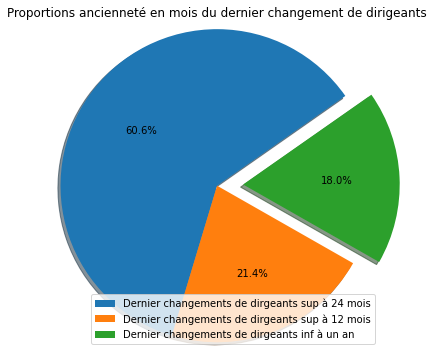

In [49]:
mmd020101= dataset.mmd020101.value_counts()[1:4]
plt.figure(figsize = (8, 6))
explode=(0,0,0.2)
plt.pie(mmd020101, autopct='%1.1f%%', shadow=True, startangle=35, radius=1.2, explode=explode)
plt.legend(mmd020101.index, loc='lower right')
plt.title("Proportions ancienneté en mois du dernier changement de dirigeants")
plt.show()
# 61% des Eses ont connu un changement de dirigeant de plus de 24 mois, on doit surveiller les 18% d'entreprises qui ont fait un changement récent

In [50]:
dataset['mmd0303'].value_counts()
#Ancienneté en mois de la dernière décision de poursuite de l'activité/ non dissolution
#On a 961 Société qui ont une anciennté de 24 à 60 mois donc les 94 société qui ont moins d'un an depuis
#la décison de dissolution doivent encore faire l'objet de surveillance 

MMD0303_24_60    961
MMD0303_12_23    202
MMD0303_0_11      94
Name: mmd0303, dtype: int64

In [51]:
# Recodage du mmd0303 vers une chaine de caractère:
dataset['mmd0303']= dataset.mmd0303.apply(lambda x: "Décision de poursuite de l'activité sup à 24 mois" if x == "MMD0303_24_60"
                                     else "Décision de poursuite de l'activité sup à 12 mois" if x == "MMD0303_12_23"
                                     else "Décision de poursuite de l'activité inf à un an" if x == "MMD0303_0_11"
                                     else "Pas de décision de dissolution")

In [52]:
dataset['mmd0303'].value_counts()

Pas de décision de dissolution                       98743
Décision de poursuite de l'activité sup à 24 mois      961
Décision de poursuite de l'activité sup à 12 mois      202
Décision de poursuite de l'activité inf à un an         94
Name: mmd0303, dtype: int64

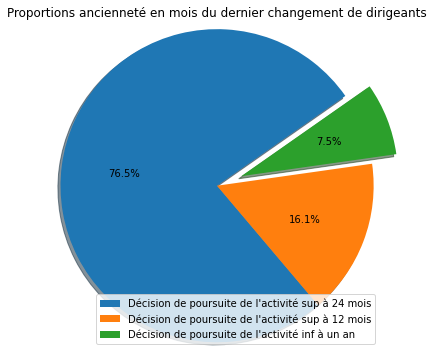

In [53]:
mmd0303= dataset.mmd0303.value_counts()[1:4]
plt.figure(figsize = (8, 6))
explode=(0,0,0.2)
plt.pie(mmd0303, autopct='%1.1f%%', shadow=True, startangle=35, radius=1.2, explode=explode)
plt.legend(mmd0303.index, loc='lower right')
plt.title("Proportions ancienneté en mois du dernier changement de dirigeants")
plt.show()
# 77% des décisions de poursuite de l'activité ont une ancienneté > à 24 mois il faut rester vigileant 
# sur les 8% qui ont une ancienneté inférieur à un an 

In [54]:
dataset['mmd0402'].value_counts()
# Ancienneté en mois du dernier changement sur l'enseigne, le sigle ou le nom commercial 

MMD0402_24_60    1223
MMD0402_12_23     484
MMD0402_0_11      447
Name: mmd0402, dtype: int64

In [55]:
# Recodage du mmd0402 vers une chaine de caractère:
dataset['mmd0402']= dataset.mmd0402.apply(lambda x: "Changements d'enseigne sup à 24 mois" if x == "MMD0402_24_60"
                                     else "Changements d'enseigne sup à 12 mois" if x == "MMD0402_12_23"
                                     else "Changements d'enseigne inf à un an" if x == "MMD0402_0_11"
                                     else "Pas de changements d'enseigne ou de nom commercial")

In [56]:
dataset['mmd0402'].value_counts()

Pas de changements d'enseigne ou de nom commercial    97846
Changements d'enseigne sup à 24 mois                   1223
Changements d'enseigne sup à 12 mois                    484
Changements d'enseigne inf à un an                      447
Name: mmd0402, dtype: int64

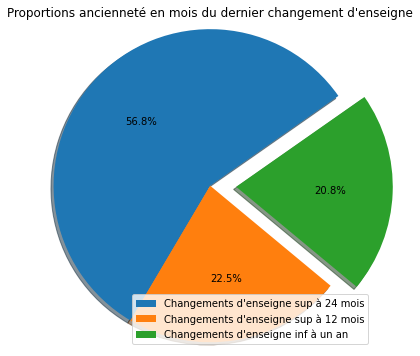

In [57]:
mmd0402= dataset.mmd0402.value_counts()[1:4]
plt.figure(figsize = (8, 6))
explode=(0,0,0.2)
plt.pie(mmd0402, autopct='%1.1f%%', shadow=True, startangle=35, radius=1.2, explode=explode)
plt.legend(mmd0402.index, loc='lower right')
plt.title("Proportions ancienneté en mois du dernier changement d'enseigne")
plt.show()
# 57% des changements d'enseignes ont une ancienneté > à 24 mois il faut rester vigileant 
# sur les 21% qui ont une ancienneté inférieur à un an. Effectivement une socité qui décide de changer d'enseigne
# ou de nom commercials’expose à des problèmes de gestion financières avec les différents 
#établissements financiers. En plus, en matière de positionnement sur le net, la société risque de perdre 
#des clients potentiels à cause de son absence de l’indexe de Google.

In [58]:
dataset['mmd0501'].value_counts()
# Ancienneté en mois du dernier transfert de siège

MMD0501_12_35    4428
MMD0501_36_60    3313
MMD0501_0_11     1003
Name: mmd0501, dtype: int64

In [59]:
# Recodage du mmd050 vers une chaine de caractère:
dataset['mmd0501']= dataset.mmd0501.apply(lambda x: "Transferts de siège sup à 36 mois" if x == "MMD0501_36_60"
                                     else "Transferts de siège sup à 12 mois" if x == "MMD0501_12_35"
                                     else "Transferts de siège inf à un an" if x == "MMD0501_0_11"
                                     else "Pas de transfert de siège")

In [60]:
dataset['mmd0501'].value_counts()

Pas de transfert de siège            91256
Transferts de siège sup à 12 mois     4428
Transferts de siège sup à 36 mois     3313
Transferts de siège inf à un an       1003
Name: mmd0501, dtype: int64

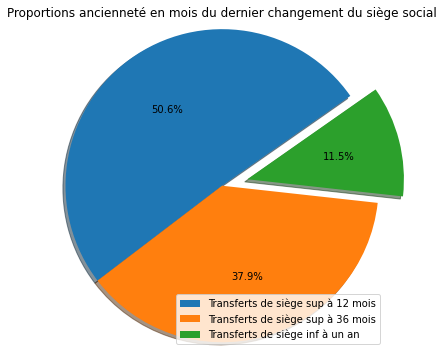

In [61]:
mmd0501= dataset.mmd0501.value_counts()[1:4]
plt.figure(figsize = (8, 6))
explode=(0,0,0.2)
plt.pie(mmd0501, autopct='%1.1f%%', shadow=True, startangle=35, radius=1.2, explode=explode)
plt.legend(mmd0501.index, loc='lower right')
plt.title("Proportions ancienneté en mois du dernier changement du siège social")
plt.show()

In [62]:
# 51% des changements de siège socialont une  ancienneté > à 36 mois et 12% qui ont une ancienneté inférieur à un an.

***Préprocessing***

- supression de la colonne legal_code qui est vide
- les vbles ne convergent pas entre elles, chaque feature est indépendant et apporte une nouvelle information 
- Je supprime id_firm zipcode et naf_code puisque ce sont des identifiants et n'apportent pas un plus 


In [63]:
# Drop useless columns / columns with too many missing values
useless_cols = ['id_firm','legal_code','naf_code','zipcode']

print("Dropping useless columns...")
dataset = dataset.drop(useless_cols, axis=1)
print("...Done.")
dataset.shape

Dropping useless columns...
...Done.


(100000, 16)

In [64]:
dataset["bad"].value_counts()

Non défaillance    98637
Défaillance         1363
Name: bad, dtype: int64

- Etant donné que mon dataset est déséquilibré je décide de travailler sur un sous échantillon aléatoire

In [65]:
bad_grp=dataset.groupby(['bad'])

In [66]:
data1=bad_grp.get_group(('Défaillance'))
data1.shape

(1363, 16)

In [67]:
data2=bad_grp.get_group(('Non défaillance')).sample(n=5000)
data2.shape

(5000, 16)

In [68]:
data2= pd.concat([data2, data1])
data2.shape

(6363, 16)

In [69]:
data2['bad'].value_counts()

Non défaillance    5000
Défaillance        1363
Name: bad, dtype: int64

In [70]:
display(100*dataset.isnull().sum()/dataset.shape[0])

activity_index     0.465
bonus_a            0.000
bonus_c            0.000
origin             0.772
monoact_code       4.968
age_months         0.046
nb_employees       0.041
paydex            90.159
nb_sites           0.000
ind_privilege      0.000
mmd020101          0.000
mmd0303            0.000
mmd0402            0.000
mmd0501            0.000
bad                0.000
bad_type          98.637
dtype: float64

In [71]:
dataset['monoact_code'].value_counts()
# L'indice de monoactivité de l'entreprise permet de qualifier, pour les entreprises pluri-établissements,
# l'homogénéité des activités. On peut dire que la plupart des entreprises ont une seule activité

1.0    94904
7.0      103
6.0       14
2.0        4
3.0        3
4.0        3
0.0        1
Name: monoact_code, dtype: int64

- Etant donnée qu'il y a beaucoup de valeurs manquantes dans paydex et bad_type je décide les enlever 
- activity_index je le supprime aussi c'est un indicateur d'intensité d'activité, il a beaucoup de catégories
- monoact_code je le supprime aussi il n'apporte pas un plus

In [72]:
# Drop useless columns / columns with too many missing values
useless_cols = ['activity_index','monoact_code','paydex','bad_type',]
dataset = data2.drop(useless_cols, axis=1)
dataset.shape

(6363, 12)

In [73]:
# On va supprimer les valeurs abérantes comme on la constaté dans le graphique ci-dessus

print('Dropping outliers in age_months...')
to_keep = (dataset['age_months'] > 0) | (dataset['age_months']<=1188) # We want keeping positives values or missings
dataset = dataset.loc[to_keep,:] 
print('Done. Number of lines remaining : ', dataset.shape[0])
print()

dataset.shape

Dropping outliers in age_months...
Done. Number of lines remaining :  6362



(6362, 12)

In [74]:
display(100*dataset.isnull().sum()/dataset.shape[0])

bonus_a          0.000000
bonus_c          0.000000
origin           0.597296
age_months       0.000000
nb_employees     0.000000
nb_sites         0.000000
ind_privilege    0.000000
mmd020101        0.000000
mmd0303          0.000000
mmd0402          0.000000
mmd0501          0.000000
bad              0.000000
dtype: float64

In [75]:
dataset['origin'].value_counts()

1     5460
3      301
9      297
NR     105
6       95
4       50
C        7
8        7
5        1
D        1
Name: origin, dtype: int64

In [76]:
#Origin:je vais remplacer les valeurs manuqnates par 1 qui est la valeur la plus représentée

In [77]:
# Recodage de l'indicateur de défaillance vers une numérique:
dataset['bad']= dataset.bad.apply(lambda x:0  if x == "Non défaillance"
                                     else 1 if x == "Défaillance"
                                     else "No data")

In [78]:
# Separate target variable Y from features X
target_name = 'bad'

print("Separating labels from features...")
Y = dataset.loc[:,target_name]
X = dataset.loc[:,[c for c in dataset.columns if c!=target_name]] # All columns are kept, except the target
print("...Done.")


Separating labels from features...
...Done.


#cat_column = [c for c in data.columns.values if data[c].dtype == 'object']
cat_column_index = [X.columns.get_loc(c) for c in X.columns if X[c].dtype == 'object']  #selecting indexes of the categorical variables
num_column_index = [X.columns.get_loc(c) for c in X.columns if X[c].dtype != 'object'] #selecting indexes of the numerical variables

In [79]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X = X.values
Y = Y.tolist()
print("...Done")

Convert pandas DataFrames to numpy arrays...
...Done


In [80]:
# 2ème étape je fais mon train test_split:  
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0,stratify=Y)
print("...Done.")
print()
# Qd on travaille en classification il faut rajouter l'argument stratify, pour avoir la mm proportion de Y sur le train et sur le test 

Dividing into train and test sets...
...Done.



In [81]:
# Create pipeline for numeric features
numeric_features = [3,5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# Create pipeline for categorical features
categorical_features = [0,1,2,4,6,7,8,9,10] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])


# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train = preprocessor.fit_transform(X_train)
print('...Done.')

X_test = preprocessor.transform(X_test) 
print('Done')


...Done.
Done


Logistic Regression

In [82]:
# Train model
model = LogisticRegression(C=0.91, dual=False, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2', verbose=0)

model.fit(X_train, Y_train)
print("...Done.")


...Done.


In [83]:
# Predictions on sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
# Print scores
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.8486932599724897
Accuracy on test set :  0.8476040848389631


In [85]:
print('f1 train :',f1_score(Y_train, Y_train_pred))
print('f1 test :',f1_score(Y_test, Y_test_pred))

f1 train : 0.6035015447991761
f1 test : 0.5889830508474576


In [86]:
print(classification_report(y_true=Y_test, y_pred=model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1000
           1       0.70      0.51      0.59       273

    accuracy                           0.85      1273
   macro avg       0.79      0.72      0.75      1273
weighted avg       0.84      0.85      0.84      1273



[]

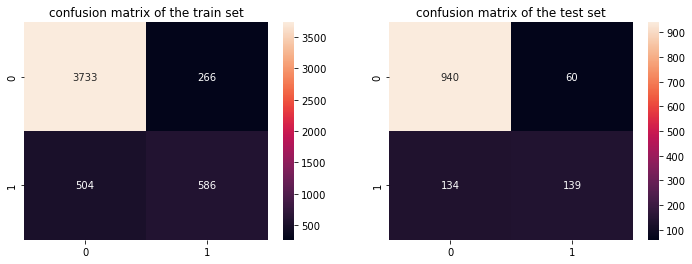

In [87]:
# Create confusion Matrix

cm_train = metrics.confusion_matrix(Y_train, Y_train_pred) 
cm_test = metrics.confusion_matrix(Y_test, Y_test_pred) 


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.heatmap(cm_train, annot=True, ax = ax1, fmt=".6g" )
sns.heatmap(cm_test, annot=True, ax = ax2, fmt=".6g" )


ax1.set_title('confusion matrix of the train set')
ax2.set_title('confusion matrix of the test set')
plt.plot()
# la matrice de confusion est une matrice qui mesure la qualité d'un système de classification, on s'intèresse à la ligne 
# orthogonale pr le train set on a 244 FN et 505 FP(les 244 FN nous intéresse ces entreprises sont considerées comme non défaillantes
# alors qu'elles le sont)

In [89]:
# Visualize ROC curves
probas_train = model.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = roc_curve(Y_train, probas_train)
fig = go.Figure(
    data = go.Scatter(
        name = 'train',
        x = recalls, 
        y = precisions, 
        mode = 'lines'
    ),
    layout = go.Layout(
        title = go.layout.Title(text = "ROC curve", x = 0.5),
        xaxis = go.layout.XAxis(title = 'False Positive Rate'),
        yaxis = go.layout.YAxis(title = 'True Positive Rate')
    )
)

probas_test = model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = roc_curve(Y_test, probas_test)
fig.add_trace(go.Scatter(
    name = 'test',
    x = recalls, 
    y = precisions, 
    mode = 'lines'
    )
)
fig.show()

Decision Tree

In [90]:
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth = 5, min_samples_split=2,
                              min_samples_leaf=9, min_weight_fraction_leaf=0.0, max_features=None, random_state=None,
                              max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)



In [91]:
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=9)

In [92]:
print('f1 train :',f1_score(Y_train, decision_tree.predict(X_train) ))
print('f1 test :',f1_score(Y_test, decision_tree.predict(X_test) ))

f1 train : 0.7740903638544582
f1 test : 0.7862969004893964


---Random Forest

In [93]:
rdm_forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=7, min_samples_split=2, min_samples_leaf=3, 
                       random_state=2)

rdm_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, random_state=2)

In [94]:
print('f1 train :',f1_score(Y_train, rdm_forest.predict(X_train) ))
print('f1 test :',f1_score(Y_test, rdm_forest.predict(X_test) ))

f1 train : 0.7711464147702877
f1 test : 0.7646017699115044
